In [1]:
# Principal Components Regression (PCR)

In [2]:
install.packages("pls")


  There is a binary version available but the source version is later:
    binary source needs_compilation
pls  2.7-3  2.8-0             FALSE



installing the source package 'pls'



In [3]:
library(pls)


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [4]:
library(ISLR)

In [5]:
fix(Hitters)

In [6]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [7]:
dim(Hitters)

[1] 322  20

In [8]:
sum(is.na(Hitters$Salary))

[1] 59

In [9]:
Hitters = na.omit(Hitters)

In [10]:
dim(Hitters)

[1] 263  20

In [11]:
sum(is.na(Hitters))

[1] 0

In [12]:
set.seed(2)

In [13]:
pcr.fit = pcr (Salary~.,data=Hitters,scale=TRUE,validation="CV")

In [14]:
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    351.9    353.2    355.0    352.8    348.4    343.6
adjCV          452    351.6    352.7    354.4    352.1    347.6    342.7
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       345.5    347.7    349.6     351.4     352.1     353.5     358.2
adjCV    344.7    346.7    348.5     350.1     350.7     352.0     356.5
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        349.7     349.4     339.9     341.6     339.2     339.6
adjCV     348.0     347.7     338.2     339.7     337.2     337.6

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

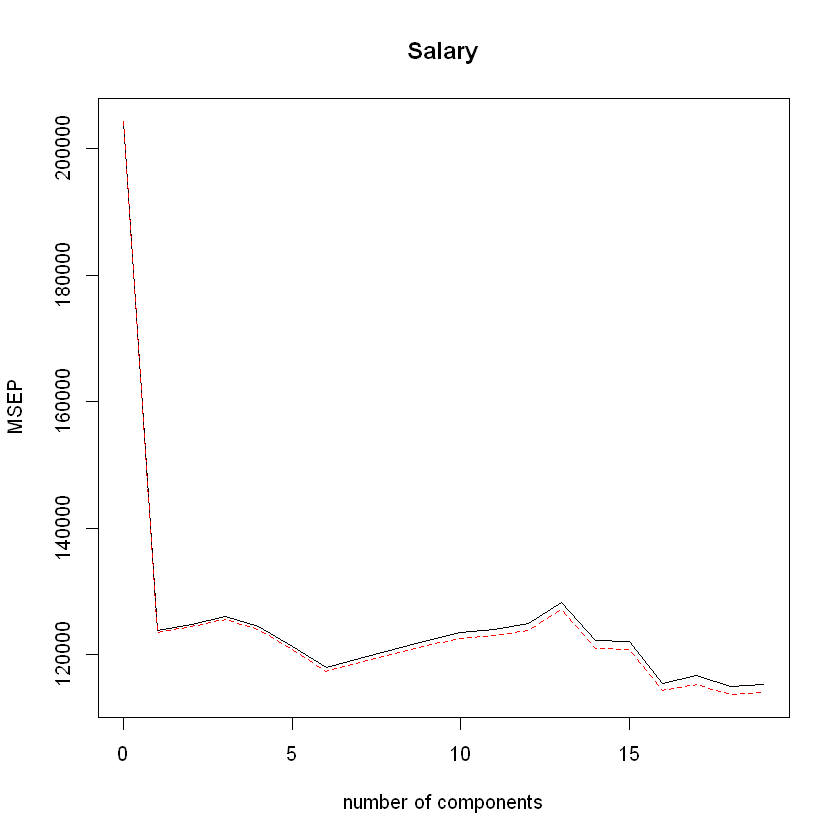

In [15]:
validationplot(pcr.fit,val.type = "MSEP")

In [16]:
set.seed(1)

In [17]:
train = sample(c(TRUE,FALSE),nrow(Hitters),rep=TRUE)

In [18]:
test=(!train)

In [19]:
x = model.matrix(Salary~.,Hitters)[,-1]

In [20]:
y = Hitters$Salary

In [21]:
set.seed(1)

In [22]:
train = sample(1:nrow(x),nrow(x)/2)

In [23]:
test = (-train)

In [24]:
y.test = y[test]

In [25]:
# perform PCR on the training data and evaluate its test set performance

In [26]:
set.seed(1)

In [27]:
pcr.fit = pcr (Salary~.,data=Hitters,subset = train, scale=TRUE,validation="CV")

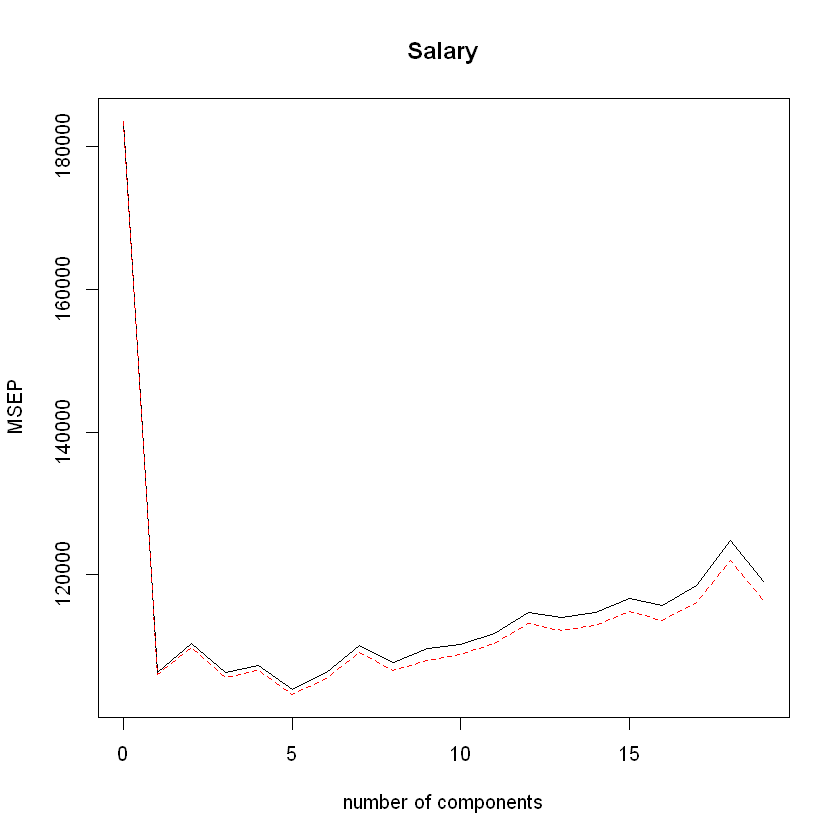

In [28]:
validationplot(pcr.fit,val.type="MSEP")

In [47]:
pcr.pred = predict(pcr.fit, x[test,],ncomp=5)

In [30]:
mean((pcr.pred-y.test)^2)

[1] 142811.8

In [31]:
pcr.fit=pcr(y~x,scale=TRUE,ncomp=5)

In [32]:
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps
X    38.31    60.16    70.84    79.03    84.29
y    40.63    41.58    42.17    43.22    44.90


In [33]:
# Partial Least Squares (PLS)

In [34]:
set.seed(1)

In [35]:
pls.fit = plsr(Salary~., data = Hitters, subset = train, scale = TRUE, validation = "CV")

In [36]:
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           428.3    325.5    329.9    328.8    339.0    338.9    340.1
adjCV        428.3    325.0    328.2    327.2    336.6    336.1    336.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       339.0    347.1    346.4     343.4     341.5     345.4     356.4
adjCV    336.2    343.4    342.8     340.2     338.3     341.8     351.1
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        348.4     349.1     350.0     344.2     344.5     345.0
adjCV     344.2     345.0     345.9     340.4     340.6     341.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         39.13    48.80    60.09    75.07    78.58    81.12    88.21    90.71
Salary 

In [37]:
# Now evaluate the test set MSE

In [38]:
pls.pred = predict(pls.fit, x[test,],ncomp=2)

In [39]:
mean((pls.pred - y.test)^2)

[1] 145367.7

In [40]:
pls.fit = plsr(Salary~., data = Hitters, scale=TRUE, ncomp=2)

In [41]:
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40


In [42]:
# compare with linear regression

In [43]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 3.6.3"

In [44]:
lm.fit = lm(Salary~.,data=Hitters)

In [50]:
smlm = summary(lm.fit)

In [53]:
smlm$sigma^2 * smlm$fstatistic[3]/(1+sum(smlm$fstatistic[2:3]))

dendf 
92017.87

In [57]:
# Ridge Regression

In [58]:
x = model.matrix(Salary~., Hitters)[,-1]

In [59]:
y = Hitters$Salary

In [60]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [61]:
grid = 10^seq(10,-2,length = 100)

In [62]:
ridge.mod = glmnet(x,y,alpha=0,lambda=grid)

In [63]:
dim(coef(ridge.mod))

[1]  20 100

In [65]:
set.seed(1)

In [66]:
train=sample(1:nrow(x),nrow(x)/2)

In [67]:
test=(-train)

In [68]:
y.test=y[test]

In [69]:
ridge.mod = glmnet(x[train,],y[train],alpha=0,lambda=grid,thresh=1e-12)

In [70]:
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])

In [71]:
mean((ridge.pred-y.test)^2)

[1] 142199.2

In [72]:
# Lasso

In [73]:
lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

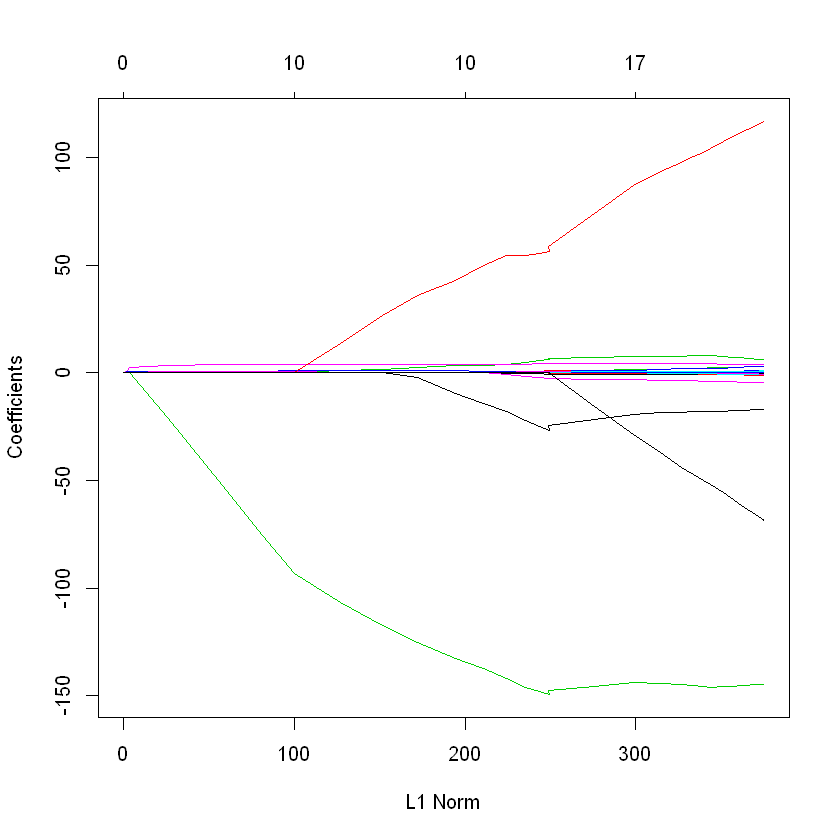

In [74]:
plot(lasso.mod)

In [75]:
set.seed(1)

In [76]:
cv.out=cv.glmnet(x[train,],y[train],alpha=1)

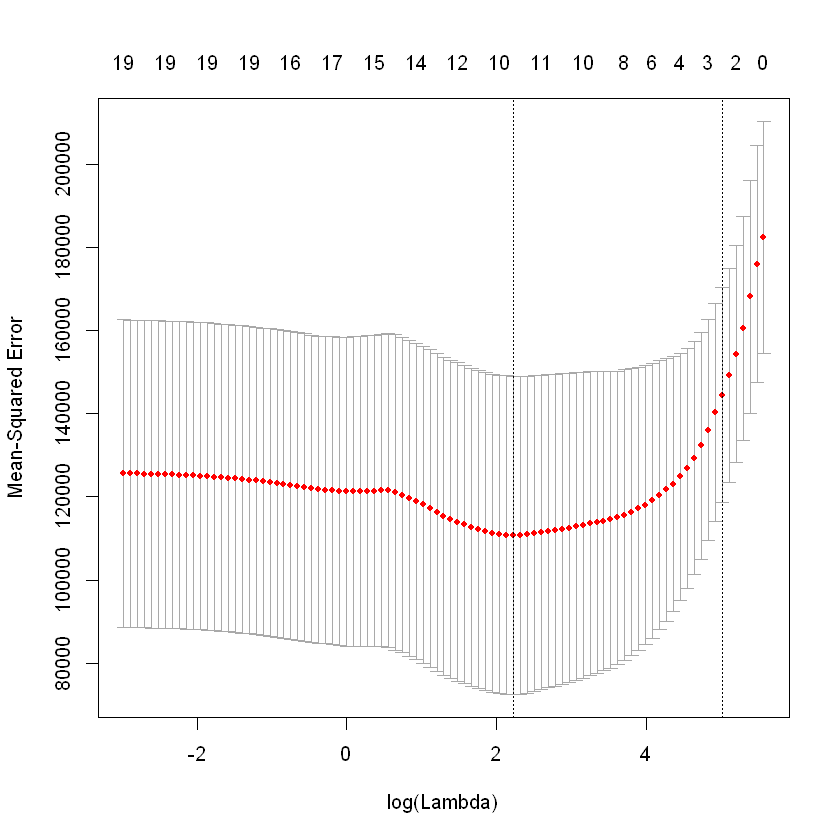

In [77]:
plot(cv.out)

In [78]:
bestlam=cv.out$lambda.min

In [79]:
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])

In [80]:
mean((lasso.pred-y.test)^2)

[1] 143673.6